In [1]:
import numpy as np
import matplotlib.pyplot as plt

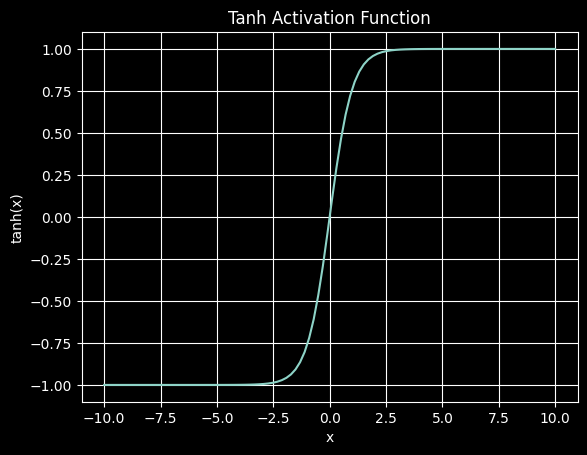

In [2]:
x = np.linspace(-10, 10, 100)
y = np.tanh(x)

# Plotting
plt.plot(x, y)
plt.title("Tanh Activation Function")
plt.xlabel("x")
plt.ylabel("tanh(x)")
plt.grid(True)
plt.show()

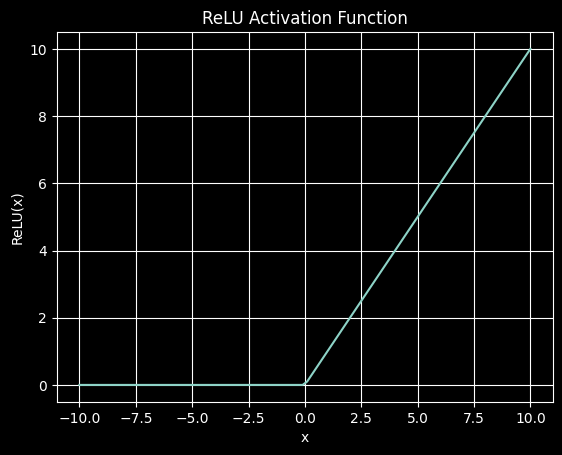

In [3]:
y_relu = np.maximum(0, x)

# Plotting
plt.plot(x, y_relu)
plt.title("ReLU Activation Function")
plt.xlabel("x")
plt.ylabel("ReLU(x)")
plt.grid(True)
plt.show()

In [4]:
import pandas as pd

# Define the DataFrame
data = {'Age': [16, 19, 18, 20, 19, 21], 'Fee': [12, 11, 11, 13, 14, 15], 'School': ['Purdue', 'Purdue', 'Indiana', 'Indiana', 'Notre Dame', 'Notre Dame']}
df = pd.DataFrame(data)

# 1. Rows where Age > 18
AgeLargerThan18 = df[df['Age'] > 18]

# 2. Remove duplicated schools
Schools = df['School'].drop_duplicates()

# 3. Add calculated column "FourYearFee"
df['FourYearFee'] = df['Fee'] * 4

# 4. Sort df by Age in ascending order
df_sorted = df.sort_values(by='Age')

# 5. Standard deviation of the Fee
fee_std = df['Fee'].std()
